In [34]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('..')
import random
from pyzx.graph import Graph
from pyzx.examples import cnots
from pyzx.simplify import phase_free_simp
from pyzx.drawing import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
random.seed(1000)
g = cnots(5,30)
#g.set_angle(56, 1)

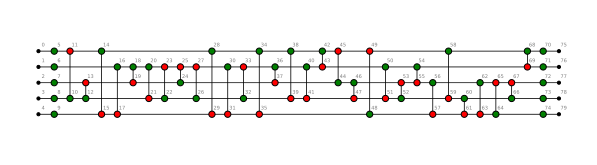

In [39]:
draw(g, layout=circuit_layout(g), labels=True)

In [40]:
phase_free_simp(g)
pack_circuit_nf(g, 'grg')

spider_simp
12. 9. 7. 3. 3. 1. 
finished in 7 iterations
bialg_simp
8. 2. 
finished in 3 iterations


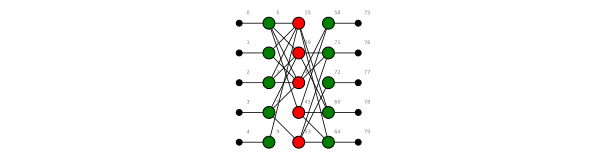

In [41]:
draw(g, layout=circuit_layout(g), labels=True)

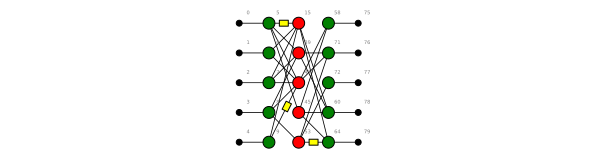

In [42]:
g.graph[9][43] = 2
g.graph[53][64] = 2
g.graph[5][15] = 2
draw(g, layout=circuit_layout(g), labels=True)